###Training the model

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from train_classifier import construct_training_image

First construct an image of training examples to train the digit classifier on:

In [3]:
# SAMPLE_IMAGES = PATH + 'digit_training_frames/'
# TARGET_DIR = PATH + 'fused_image/'

In [4]:
from train_classifier import show_training_digits_distribution

In [5]:
from file_utils import get_paths

In [6]:
stage_id = 1
root_path = '/Users/samuelalbanie/aims_course/project_two/data/DVD/deinterlaced/2013/'
paths = get_paths(root_path, stage_id)

In [7]:
paths['digit_training_frames']

'/Users/samuelalbanie/aims_course/project_two/data/DVD/deinterlaced/2013/ocr/digit_training_frames/'

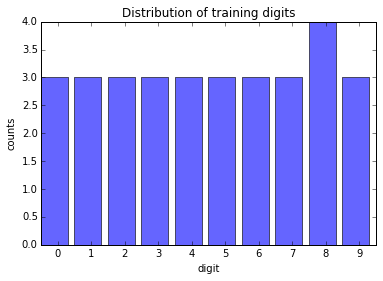

In [8]:
show_training_digits_distribution(paths)

In [9]:
from template_matching import crop_to_sign_using_template

In [10]:
from template_matching import get_templates

In [11]:
templates = get_templates(paths)

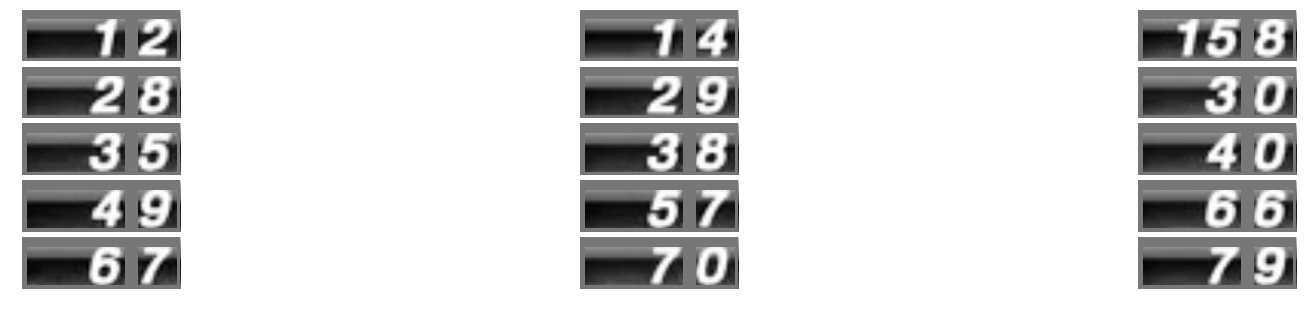

In [56]:
construct_training_image(paths)

In [57]:
from train_classifier import save_model_labels

Next we manually label each of the digits found by the contour function, and save the labels as inputs to our model, a kNN classifier

In [58]:
save_model_labels(paths)

labelling complete


###Using the model

In [12]:
%matplotlib inline

In [13]:
from file_utils import get_jpgs_in_dir
from digit_classifier import load_model, find_number

Now we can use our model

In [14]:
model = load_model(paths)

Try out some test images

In [26]:
path = PATH + 'labeled_frames/3/'
root, jpgs = get_jpgs_in_dir(path)
test_indexes = [1, 45, 200, 400, 350]
test_img_names = [root + jpgs[idx] for idx in test_indexes]

NameError: name 'PATH' is not defined

In [41]:
readings = [find_number(img_name, model) for img_name in test_img_names]

NameError: name 'test_img_names' is not defined

In [42]:
print("The extracted readings were: ", readings)

NameError: name 'readings' is not defined

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

In [146]:
sigma = 1

In [147]:
def apply_threshold_to_image(path):
    """apply a uniform threshold to convert the image located at
    `path` to binary.  he binary image is then inverted to help 
    with contour detection."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = ndimage.gaussian_filter(img, sigma=sigma)
    ret, binary_img = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
    binary_img = np.invert(binary_img)
    return binary_img  

In [148]:
examples = apply_threshold_to_image(TARGET_DIR + 'digit_examples.jpg')

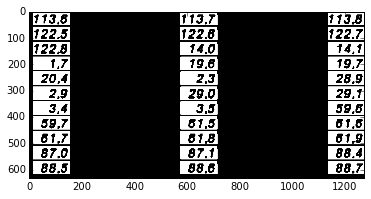

In [149]:
plt.imshow(examples, 'gray')
plt.savefig('smoothed' + str(sigma), dpi=200)

In [184]:
from file_utils import get_jpgs_in_dir
from template_matching import get_templates
from image_utils import get_fig_dimensions
from image_utils import crop_frame
from image_utils import top_border
from image_utils import find_contours
from image_utils import border_rectangle
from image_utils import apply_threshold_to_image
from template_matching import SIGN_WIDTH, SIGN_HEIGHT
from template_matching import digit_region
import matplotlib.patches as patches
import math

In [185]:
def get_subplots(num_rows, num_cols):
    """returns a tuple (fig, axes) for producing subplots
    of the given numbers of rows and columns"""
    fig, axes = plt.subplots(num_rows, num_cols)
    fig_width, fig_height = get_fig_dimensions(SIGN_WIDTH, SIGN_HEIGHT)
    fig.set_size_inches(fig_width * num_cols, fig_height * num_rows)
    fig.subplots_adjust(hspace=0, wspace=0)
    axes = [ax[0] for ax in axes.reshape(-1,1)]
    plt.axis('off')
    return (fig, axes)

In [208]:
def white_divider(img, thickness=7):
    """returns a description of a rectangle that forms the 
    grey border around the cropped image (helps with accurately 
    finding contours)"""
    rectangle = {
        'xy': (35,0),
        'width': 1,
        'height': img.shape[0] - 1,
        'fill': False,
        'edgecolor': "#777777",
        'linewidth': thickness
    }
    return rectangle

In [209]:
def construct_training_image2(src_dir, num_cols=3):
    """constructs an image containing at least one example of 
    each digit based on the files in src_dir and saves it as 
    'digit_examples.jpg' in target_dir. Saving the image isn't 
    necessary, but it provides a useful sanity check."""
    root, frame_paths = get_jpgs_in_dir(src_dir)
    templates = get_templates()
    num_rows = int(math.ceil(len(frame_paths) / num_cols))
    fig, axes = get_subplots(num_rows, num_cols)
    
    for frame, ax in zip(frame_paths, axes):
        img = cv2.imread(root + frame, cv2.IMREAD_GRAYSCALE)
        km_img = digit_region(img, templates['flag'])
        rectangle = border_rectangle(km_img)
        top = top_border(km_img)
        divider = white_divider(km_img)
        ax.imshow(km_img, cmap = plt.cm.Greys_r)
        ax.add_patch(patches.Rectangle(**rectangle))
        ax.add_patch(patches.Rectangle(**divider))
        ax.add_patch(patches.Rectangle(**top))
        ax.set_axis_off()
    plt.show()

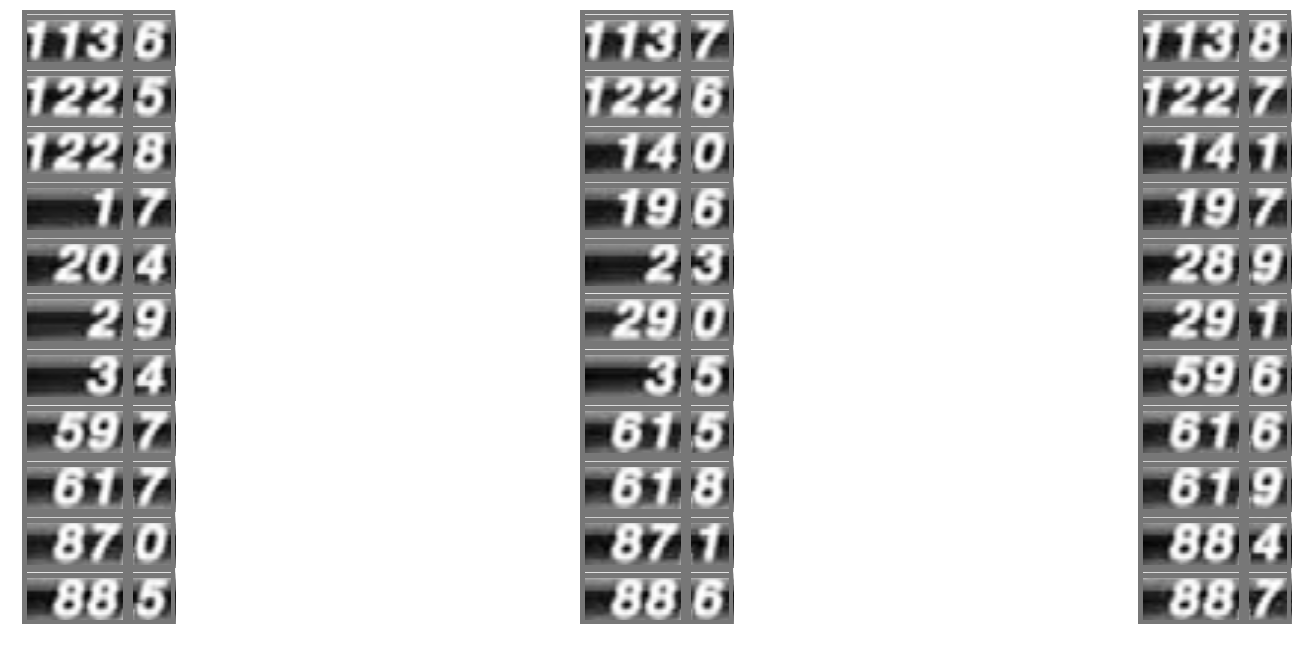

In [210]:
construct_training_image2(SAMPLE_IMAGES)